In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
# URLs to the datasets
url_tourism = "https://raw.githubusercontent.com/aidulfitri/WesataOne-ML/main/data/tourism_with_id.csv"
url_rating = "https://raw.githubusercontent.com/aidulfitri/WesataOne-ML/main/data/tourism_rating.csv"

# Reading the datasets
df_places = pd.read_csv(url_tourism)
rating_df = pd.read_csv(url_rating)

In [ ]:
# Selecting necessary columns
data_place = df_places[["Place_Id", "Place_Name", "Category", "City", "Rating"]]
rating_df = rating_df[["User_Id", "Place_Id", "Place_Ratings"]]

In [ ]:
data_place.drop_duplicates(inplace = True)
data_place.dropna(inplace=True)

<ipython-input-4-6767f218f80d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_place.drop_duplicates(inplace = True)
<ipython-input-4-6767f218f80d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_place.dropna(inplace=True)


In [ ]:
# One-hot encode Category and City features
data_place = pd.get_dummies(data_place, columns=["Category", "City"])

In [ ]:
# Preparing the feature set
X = data_place.drop(columns=["Place_Id", "Place_Name", "Rating"])
y = data_place["Rating"]

In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
# Building the TensorFlow model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
# Compiling the model
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=cost_fn,
              metrics=['mse'])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20
9/9 [==============================] - 3s 46ms/step - loss: 19.9206 - mse: 19.9206 - val_loss: 17.9509 - val_mse: 17.9509
Epoch 2/20
9/9 [==============================] - 0s 11ms/step - loss: 17.3736 - mse: 17.3736 - val_loss: 15.6447 - val_mse: 15.6447
Epoch 3/20
9/9 [==============================] - 0s 15ms/step - loss: 14.9383 - mse: 14.9383 - val_loss: 13.1196 - val_mse: 13.1196
Epoch 4/20
9/9 [==============================] - 0s 21ms/step - loss: 12.2416 - mse: 12.2416 - val_loss: 10.2847 - val_mse: 10.2847
Epoch 5/20
9/9 [==============================] - 0s 16ms/step - loss: 9.2143 - mse: 9.2143 - val_loss: 7.1751 - val_mse: 7.1751
Epoch 6/20
9/9 [==============================] - 0s 23ms/step - loss: 6.0063 - mse: 6.0063 - val_loss: 4.0974 - val_mse: 4.0974
Epoch 7/20
9/9 [==============================] - 0s 15ms/step - loss: 3.0646 - mse: 3.0646 - val_loss: 1.6376 - val_mse: 1.6376
Epoch 8/20
9/9 [==============================] - 0s 11ms/step - loss: 1.0150 - m

In [ ]:
# Evaluate the model
test_loss, test_mse = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0363 - mse: 0.0363


In [ ]:
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)


Test Loss: 0.0362962931394577
Test MSE: 0.0362962931394577


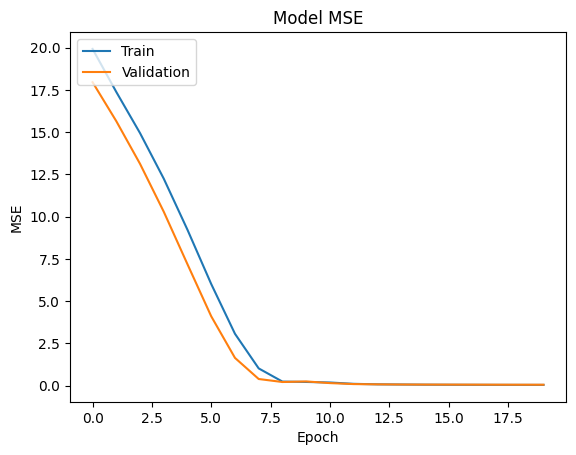

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


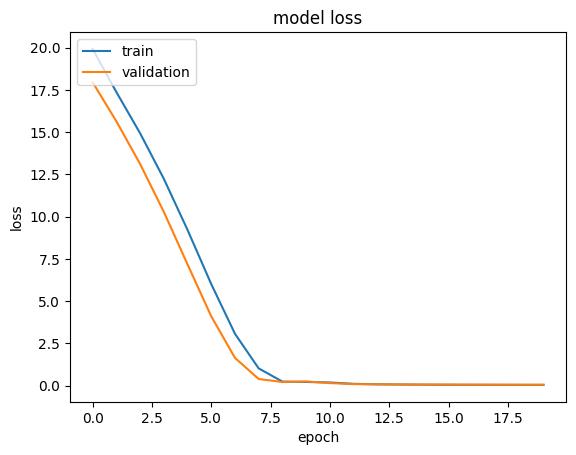

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def recommend_places(model, data_place, city, category):
    # Filter berdasarkan city dan category yang dipilih
    filtered_places = data_place[(data_place['City'] == city) & (data_place['Category'] == category)]

    # Ambil 20 tempat teratas setelah melakukan filtering
    recommendations = filtered_places[['Place_Name', 'City','Description']].head(20)

    return recommendations

recommendations = recommend_places(model, df_places, "Jakarta", "Budaya")
recommendations


,Place_Name,City,Description
0,Monumen Nasional,Jakarta,Monumen Nasional atau yang populer disingkat d...
1,Kota Tua,Jakarta,"Kota tua di Jakarta, yang juga bernama Kota Tu..."
15,Jembatan Kota Intan,Jakarta,Jembatan Kota Intan adalah jembatan tertua di ...
16,Museum Fatahillah,Jakarta,Museum Fatahillah memiliki nama resmi Museum S...
17,Museum Bank Indonesia,Jakarta,Museum Bank Indonesia adalah sebuah museum di ...
19,Museum Taman Prasasti,Jakarta,Museum Taman Prasasti adalah sebuah museum cag...
20,Museum Wayang,Jakarta,Museum Wayang adalah sebuah museum yang berlok...
23,Museum Nasional,Jakarta,Museum Nasional Republik Indonesia atau Museum...
31,Setu Babakan,Jakarta,Setu Babakan atau Danau Babakan terletak di Sr...
37,Istana Negara Republik Indonesia,Jakarta,Istana Negara merupakan pusat kegiatan pemerin...


In [ ]:
export_dir = "./modelwesataone"
tf.saved_model.save(model, export_dir = export_dir)

In [ ]:
optimization = tf.lite.Optimize.DEFAULT
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./modelwesataone.tflite')
tflite_model_file.write_bytes(tflite_model)

7352